# Analyzing apple quality data

Praciting EDA skills on new datasets. Dataset source: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("apple_quality.csv")

# Explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
df.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


# Clean any necessary data

In [5]:
# change A_id column to index
df = df.set_index(['A_id'])

In [6]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [7]:
# check for missing data
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [8]:
# can drop missing row since this won't affect the integrity of the dataset
df = df.dropna()

In [9]:
df.shape

(4000, 8)

In [10]:
# check for duplicates
df.drop_duplicates

<bound method DataFrame.drop_duplicates of             Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
A_id                                                                      
0.0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1.0    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2.0    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3.0    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4.0     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...          ...       ...        ...          ...        ...       ...   
3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999.0  0.278540 -1.715505   0.121217    -1.154075   1.26

# Data visualization

In [11]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [15]:
# what was the quality of apples?
df['Quality'].value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Sweetness'}>,
        <Axes: title={'center': 'Crunchiness'}>],
       [<Axes: title={'center': 'Juiciness'}>,
        <Axes: title={'center': 'Ripeness'}>]], dtype=object)

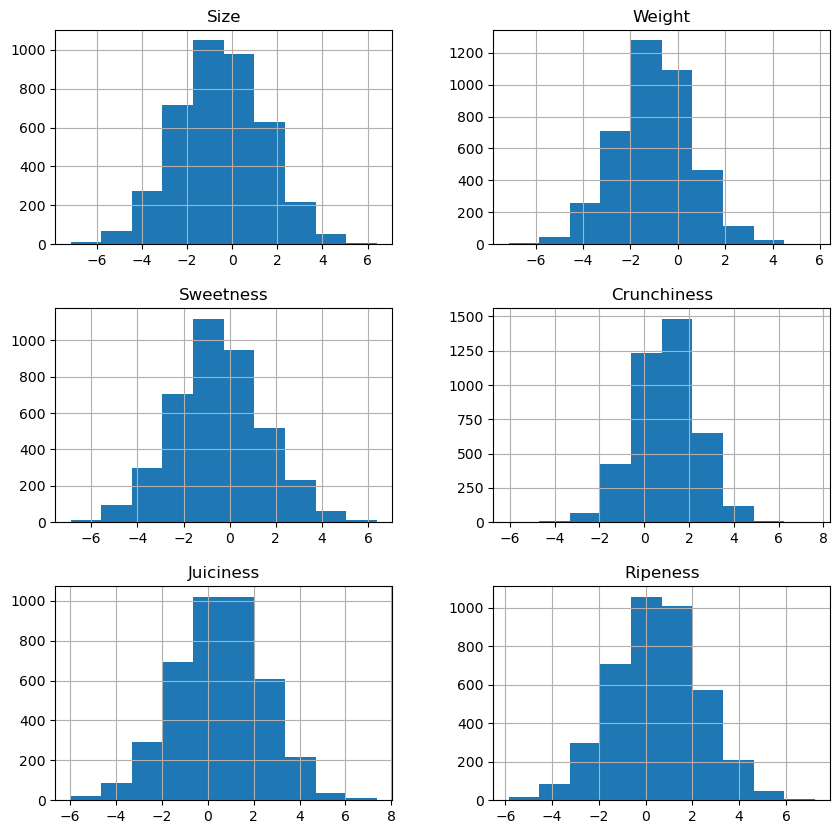

In [12]:
df.hist(figsize=(10,10))

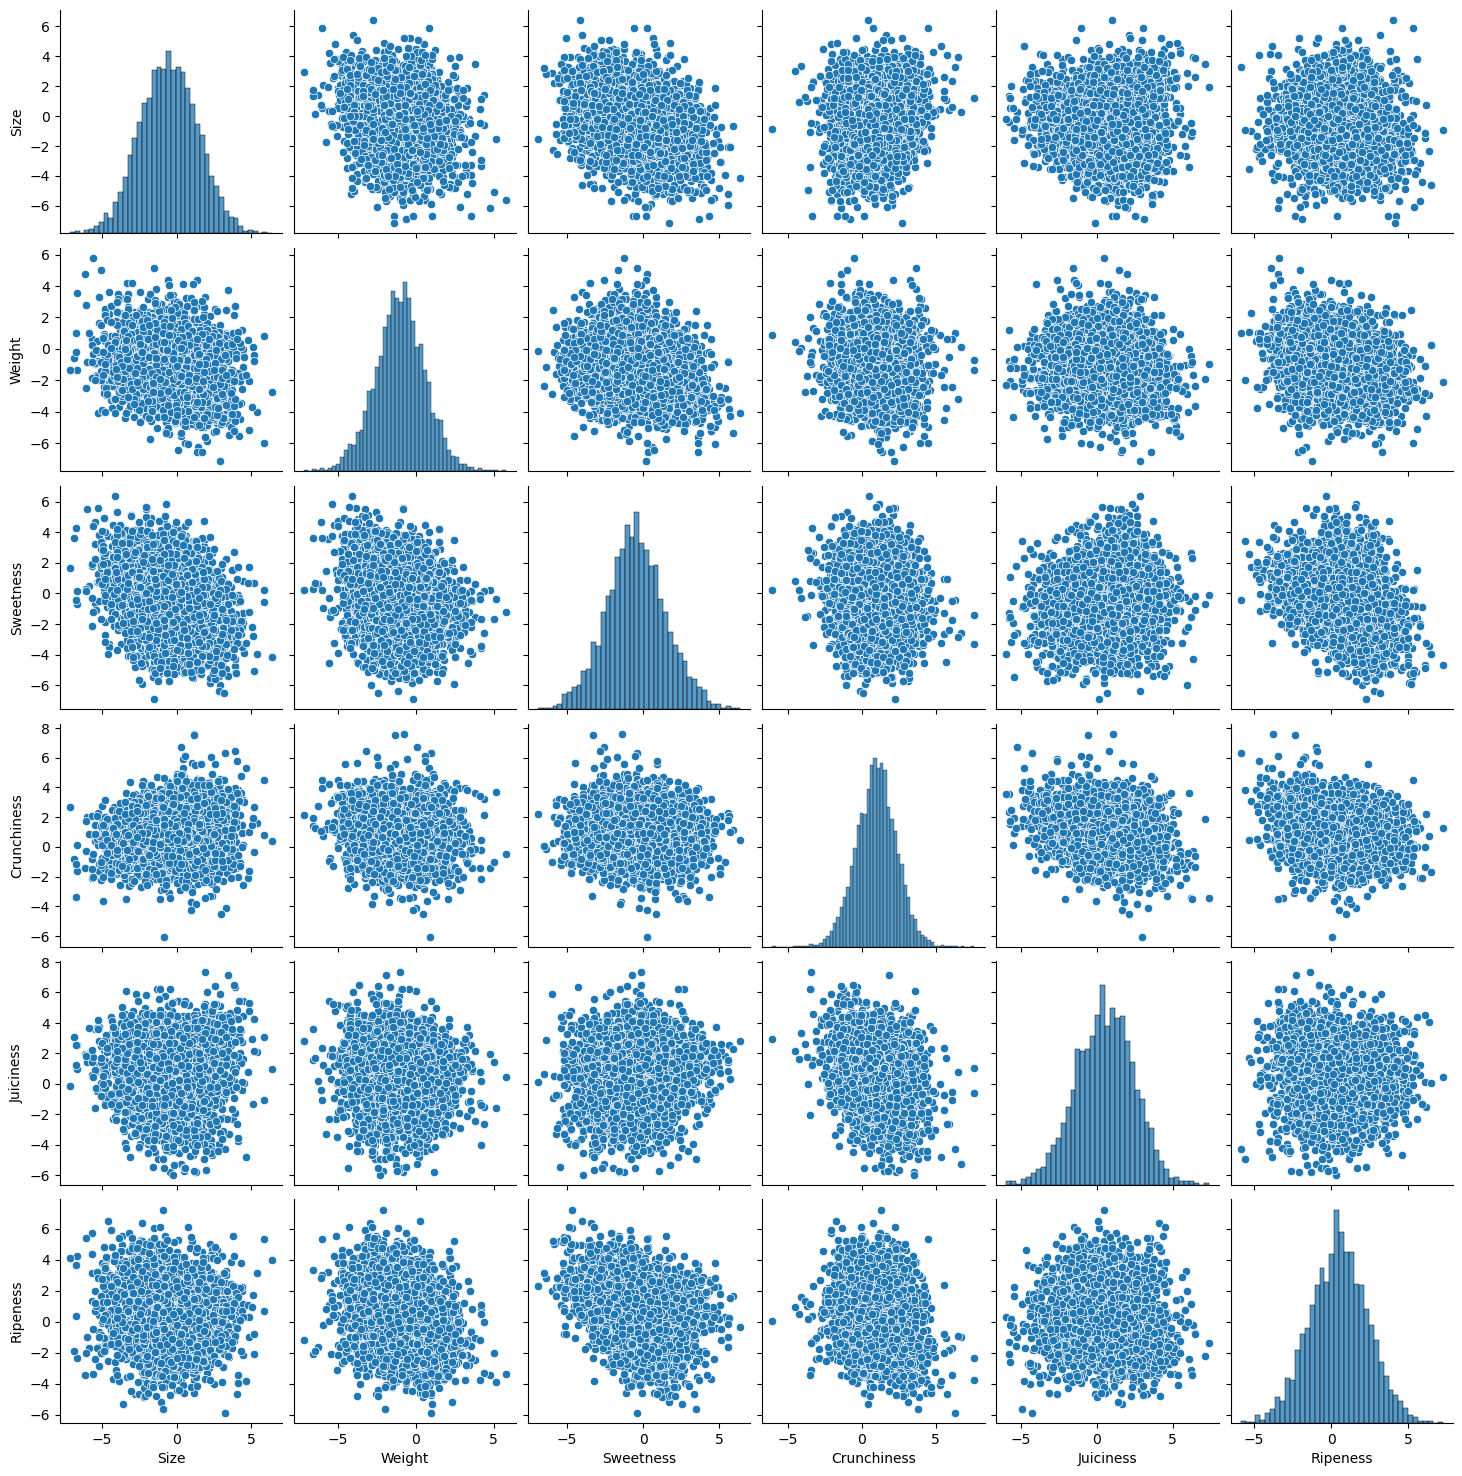

In [17]:
# find correlations
sns.pairplot(df)
plt.show()

# Prediction analysis